# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.061485e+01     7.059537e+00
 * time: 0.0018639564514160156
     1     2.744024e+01     3.837166e+00
 * time: 0.00693511962890625
     2     1.790396e+01     3.317418e+00
 * time: 0.013146162033081055
     3     1.172115e+01     1.600841e+00
 * time: 0.01809096336364746
     4     1.054429e+01     1.412221e+00
 * time: 0.0238649845123291
     5     9.714158e+00     1.169542e+00
 * time: 0.0808711051940918
     6     9.264571e+00     8.927907e-01
 * time: 0.08440303802490234
     7     8.995725e+00     9.021669e-01
 * time: 0.08784914016723633
     8     8.640253e+00     7.156288e-01
 * time: 0.09160399436950684
     9     8.371568e+00     5.247389e-01
 * time: 0.09732294082641602
    10     8.196891e+00     4.561544e-01
 * time: 0.10371112823486328
    11     8.110054e+00     3.953874e-01
 * time: 0.11008810997009277
    12     8.088347e+00     5.608703e-01
 * time: 0.11482596397399902
    13     8.064196e+00     5.224940e-01
 * time

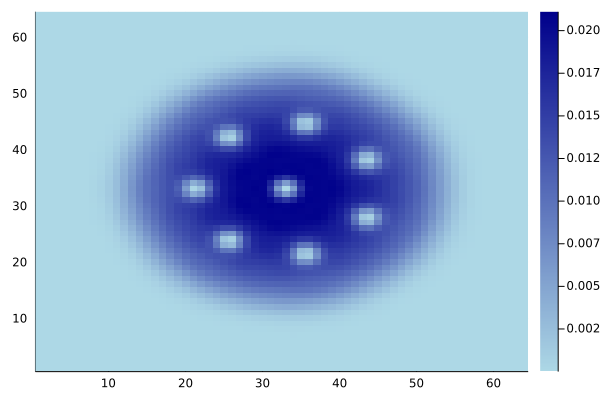

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)